In [1]:
# Project – Analyzing the trends of COVID-19 with Python
# Problem Statement: Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends

# Guidelines: • Use pandas to accumulate data from multiple data files

# • Use plotly (visualization library) to create interactive visualizations

# • Use Facebook prophet library to make time series models

# • Visualize the prediction by combining these technologies

In [2]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

In [4]:
df.shape

In [5]:
df.info()

In [6]:
df.isnull().sum()

In [7]:
# rename the columns name:
df.rename(columns={
    
    'Province/State' : 'state',
    'Country/Region' : 'country',
    'Lat' : 'lat',
    'Long' : 'long',
    'Date' : 'date',
    'Confirmed' : 'confirmed',
    'Deaths' : 'death',
    'Recovered' : 'recovered',
    'Active' : 'active',
    'WHO Region' : 'who'
    },inplace=True)

In [8]:
df.head()

In [9]:
top = df[df['date']=='2020-01-22']

In [10]:
top.groupby('country')['confirmed','death','recovered','active'].sum().reset_index()
top

In [11]:
last = df[df['date']=='2020-07-27']
# last =df[df['date']==df['date'].max()]

In [12]:
df.tail()

In [13]:
last_df = last.groupby('country')['confirmed','death','recovered','active'].sum().reset_index()
last_df

In [14]:
# Top countries having highest no. of active case
#choropleth
fix = px.choropleth(last_df,locations="country",
                   locationmode = "country names", color="active",
                   hover_name="country",range_color=[1,5000],
                   color_continuous_scale="reds",
                   title="Countries with Active Cases")
                  
fix.show()

In [15]:
# Top countries having highest no. of deaths case
#choropleth
fix = px.choropleth(last_df,locations="country",
                   locationmode = "country names", color="death",
                   hover_name="country",range_color=[1,5000],
                   color_continuous_scale="blues",
                   title="Countries with deaths Cases")
                  
fix.show()

In [16]:
totat_cases = last_df.groupby('date')['date','confirmed'].sum().reset_index()


In [17]:
totat_cases

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Observe the trend in the confirmed cases
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(40,10))
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel('Dates',fontsize=15)
plt.ylabel('total cases',fontsize=30)
plt.title('worldwide confirmed case over a time',fontsize=30)
ax = sns.pointplot(x=totat_cases.date,y=totat_cases.confirmed,color='r')
ax.set(xlabel='dates',ylabel='total cases')

In [20]:
# top countries with highest number of actives cases
top_active = last_df.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index()

In [21]:
top_active.head()

In [22]:
top_active = top_active.head(20)

In [23]:
# top 5 country have highest active case
# US
# Brazil
# India
# UK
# Russia

In [24]:
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('active case',fontsize=20)
plt.ylabel('country',fontsize=20)
plt.title('top country with active case',fontsize=20)
ax = sns.barplot(x=top_active.active,y=top_active.country)
ax.set(xlabel='active case',ylabel='country')

In [25]:
# top country with highest number of confirmed cases
top_confirmed = df.groupby(by='country')['confirmed'].sum().sort_values(ascending=False).reset_index()


In [26]:
top_confirmed

In [27]:
# top 5 country with highest number of confirmed
# US
# Brazil
# Russia
# India
# Spain


In [28]:
top_confirmed = top_confirmed.head(20)

In [29]:
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('confirmed case',fontsize=20)
plt.ylabel('country',fontsize=20)
plt.title('top 20 country with hight number of confirmed cases',fontsize=15)
ax = sns.barplot(x=top_confirmed.confirmed,y=top_confirmed.country)

In [30]:
# top country with high number of deaths:
top_deaths = df.groupby(by='country')['death'].sum().sort_values(ascending=False).reset_index()

In [31]:
top_deaths

In [32]:
top_death = top_deaths.head(20)

In [33]:
plt.xlabel('deaths',fontsize=15)
plt.ylabel('country',fontsize=15)
plt.title('top deaths country due to covid',fontsize=15)
ax = sns.barplot(x=top_death.death,y=top_death.country)
ax.set(xlabel='deaths',ylabel='country')

In [34]:
# top country with number of recovered cases:
top_recovered = df.groupby(by='country')['recovered'].sum().sort_values(ascending=False).reset_index()

In [35]:
top_recovered

In [36]:
top_recovered = top_recovered.head(20)

In [37]:
plt.xlabel('recovered case',fontsize=10)
plt.ylabel('country',fontsize=10)
plt.title('top 20 country recovered high cases',fontsize=15)
sns.barplot(x=top_recovered.recovered,y=top_recovered.country)
#ax.set(xlabel='recovered',ylabel='country')


In [38]:
# after analysing above cases we found top countries
Brazil
US
UK
India
Russia 
Germany

In [39]:
Brazil = df[df.country=='Brazil']
Brazil = Brazil.groupby(by='date')["recovered","death","confirmed","active"].sum().reset_index()


In [ ]:
us.head(15)

In [40]:
us = df[df.country=='US']
us = us.groupby(by='date')["recovered","death","confirmed","active"].sum().reset_index()


In [41]:
uk = df[df.country=='United Kingdom']
uk = uk.groupby(by='date')["recovered","death","confirmed","active"].sum().reset_index()


In [42]:
ind = df[df.country=='India']
ind = ind.groupby(by='date')["recovered","death","confirmed","active"].sum().reset_index()


In [43]:
russia = df[df.country=='Russia']
russia = russia.groupby(by='date')["recovered","death","confirmed","active"].sum().reset_index()


In [44]:
germany = df[df.country=='Germany']
germany = germany.groupby(by='date')["recovered","death","confirmed","active"].sum().reset_index()


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# confirmed cases trend in top 5 countries
plt.figure(figsize=(40,10))
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
sns.pairplot(Brazil.index,Brazil.confirmed)
sns.pairplot(us.index,us.confirmed,color="Pink")
sns.pairplot(russia.index,russia.confirmed,color="Green")
sns.pairplot(uk.index,uk.confirmed,color="black")
sns.pairplot(ind.index,ind.confirmed,color="Red")

plt.show()

In [48]:
plt.figure(figsize=(40,10))
plt.figure(figsize=(40,10))
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
sns.pairplot(Brazil.index,Brazil.recovered,color="blue")
sns.pairplot(us.index,us.recovered,color="Pink")
sns.pairplot(russia.index,russia.recovered,color="Green")
sns.pairplot(uk.index,uk.recovered,color="black")
sns.pairplot(ind.index,ind.recovered,color="Red")

plt.show()

In [1]:
pip install Pho

ModuleNotFoundError: No module named 'phophet'

In [4]:
pip install prophet

                                              0.0/12.9 MB ? eta -:--:--
                                              0.0/12.9 MB ? eta -:--:--
                                             0.0/12.9 MB 435.7 kB/s eta 0:00:30
                                             0.0/12.9 MB 435.7 kB/s eta 0:00:30
                                             0.0/12.9 MB 217.9 kB/s eta 0:00:59
                                             0.1/12.9 MB 272.3 kB/s eta 0:00:48
                                             0.1/12.9 MB 308.0 kB/s eta 0:00:42
                                             0.1/12.9 MB 344.8 kB/s eta 0:00:38
                                             0.1/12.9 MB 327.4 kB/s eta 0:00:39
                                             0.2/12.9 MB 366.6 kB/s eta 0:00:35
                                             0.2/12.9 MB 374.1 kB/s eta 0:00:34
                                             0.2/12.9 MB 393.0 kB/s eta 0:00:33
                                             0.2/12.9 MB

In [5]:
from prophet import Prophet

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [8]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [10]:
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
recovered = df.groupby('Date')['Recovered'].sum().reset_index()
death = df.groupby('Date')['Deaths'].sum().reset_index()
active = df.groupby('Date')['Active'].sum().reset_index()

In [12]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [13]:
death

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [14]:
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [15]:
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [16]:
# convert the column names to "ds" and "y"  ds(datastamp) and y(Target)
# its the basic requirement of fb prophet model to change column names

In [17]:
confirmed.columns=['ds','y']
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [18]:
recovered.columns=['ds','y']
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [37]:
death.columns=['ds','y']
death['ds']=pd.to_datetime(death['ds'])
death

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [38]:
active.columns=['ds','y']
active['ds']=pd.to_datetime(active['ds'])
active

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [21]:
model1 = Prophet(interval_width=0.95)
model1.fit(confirmed)

18:56:45 - cmdstanpy - INFO - Chain [1] start processing
18:56:46 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future1 = model1.make_future_dataframe(periods=10,freq='D')
future1.tail()

,ds
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06


In [26]:
forcast1 = model1.predict(future1)

In [27]:
forcast1[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.044339e+04,-1.844539e+05,1.334300e+05
1,2020-01-23,-7.841899e+03,-1.815651e+05,1.669523e+05
2,2020-01-24,6.024571e+03,-1.552242e+05,1.644653e+05
3,2020-01-25,1.240772e+04,-1.508534e+05,1.788801e+05
4,2020-01-26,8.645679e+03,-1.546137e+05,1.750509e+05
...,...,...,...,...
193,2020-08-02,1.736428e+07,1.717958e+07,1.754229e+07
194,2020-08-03,1.755891e+07,1.736248e+07,1.774017e+07
195,2020-08-04,1.774817e+07,1.754241e+07,1.792986e+07
196,2020-08-05,1.795804e+07,1.774931e+07,1.817128e+07


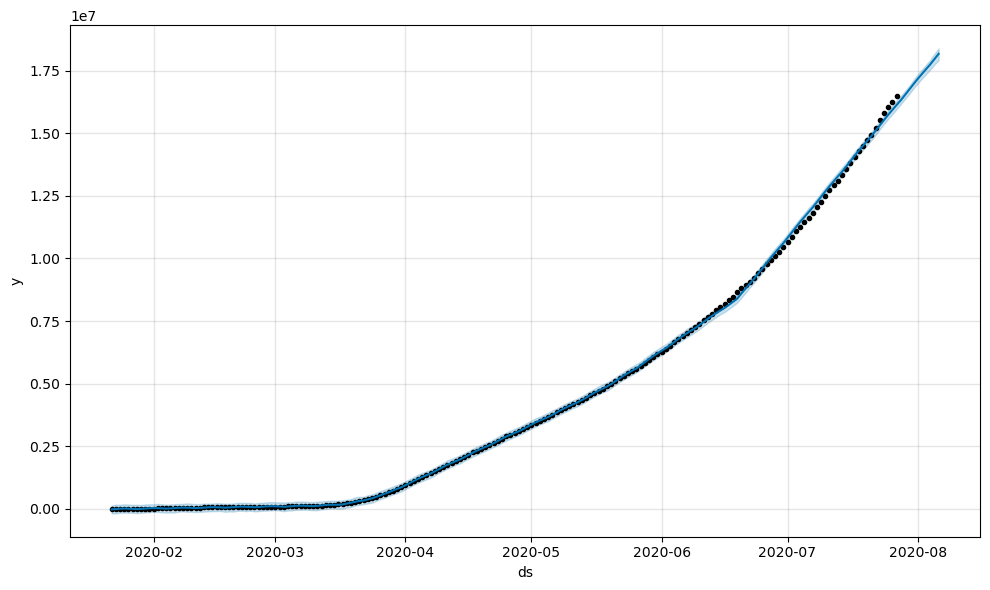

In [29]:
aa = model1.plot(forcast1)

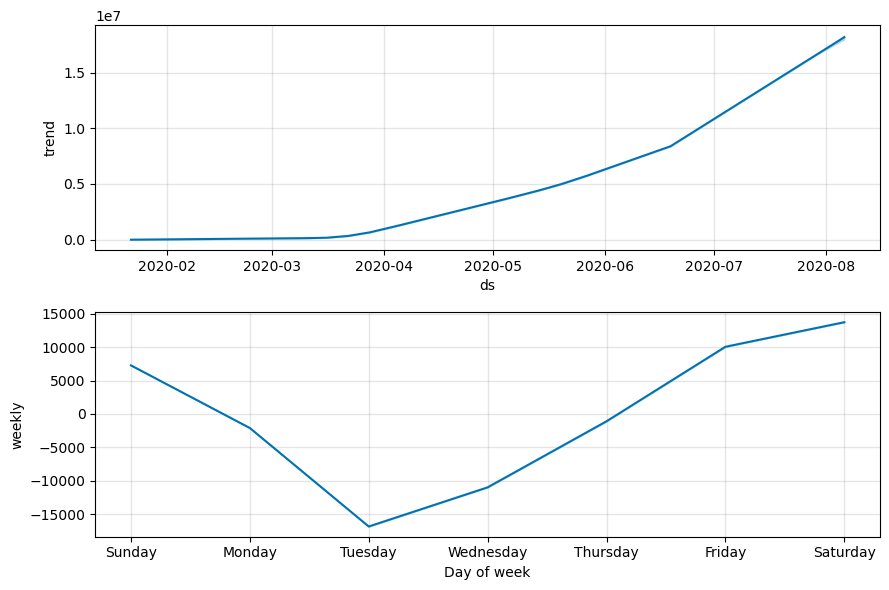

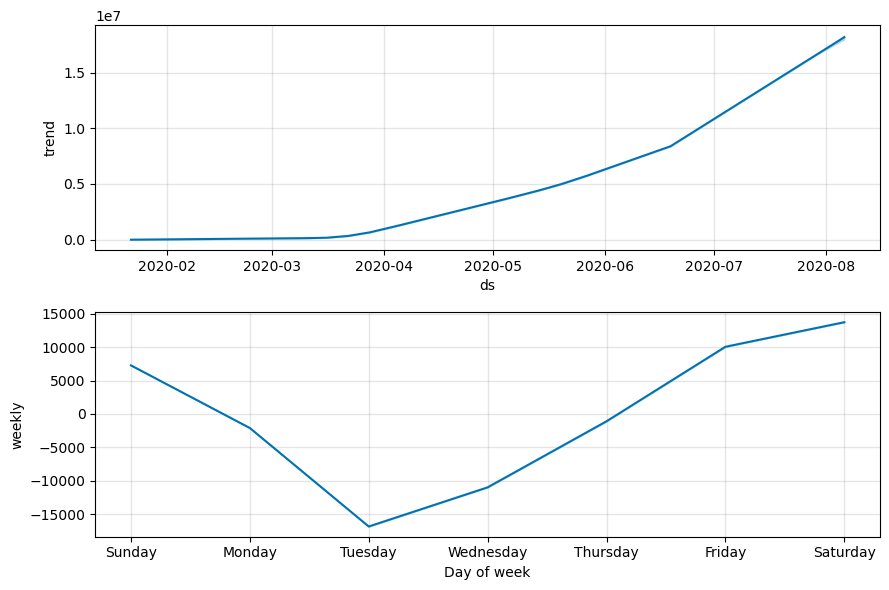

In [30]:
model1.plot_components(forcast1)

In [40]:
# model for deaths:
model2 = Prophet(interval_width=0.95)
model2.fit(death)

19:33:57 - cmdstanpy - INFO - Chain [1] start processing
19:33:58 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
dataframe = model2.make_future_dataframe(periods=15,freq='D')
dataframe.tail()

,ds
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10
202,2020-08-11


In [63]:
future = model2.predict(dataframe)
future[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-692.987003,-3677.794756,2219.562326
1,2020-01-23,-25.069877,-3268.556696,3064.990367
2,2020-01-24,549.078183,-2265.349571,3451.087495
3,2020-01-25,489.550375,-2546.716227,3654.030808
4,2020-01-26,-314.920096,-3429.891937,2643.426859
...,...,...,...,...
198,2020-08-07,704239.514986,693226.489619,714757.601543
199,2020-08-08,709122.499980,697380.776186,721196.531891
200,2020-08-09,713260.542310,701527.184265,726026.688884
201,2020-08-10,717551.119255,702603.382594,732093.247314


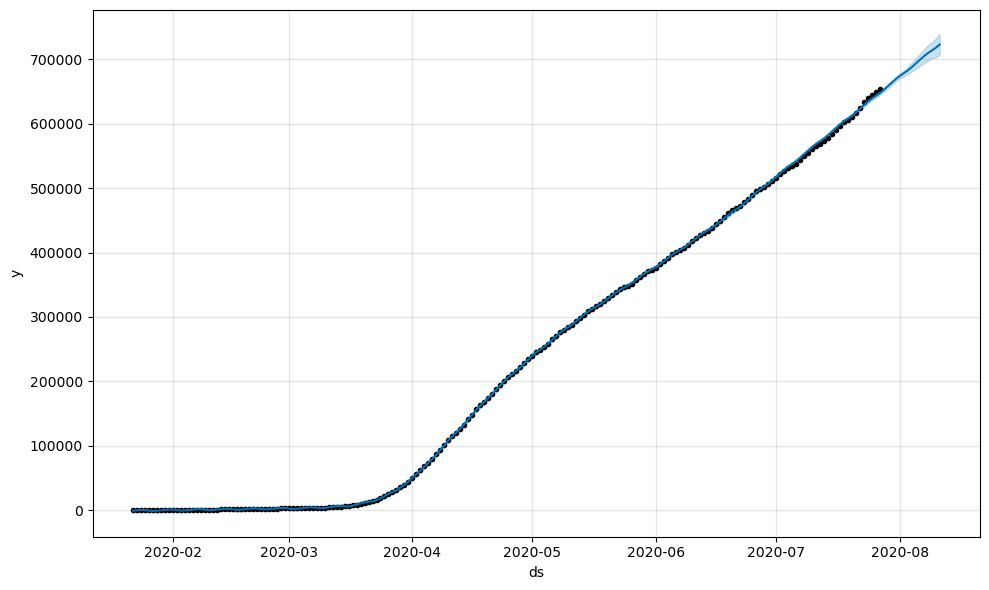

In [65]:
bb = model2.plot(future)

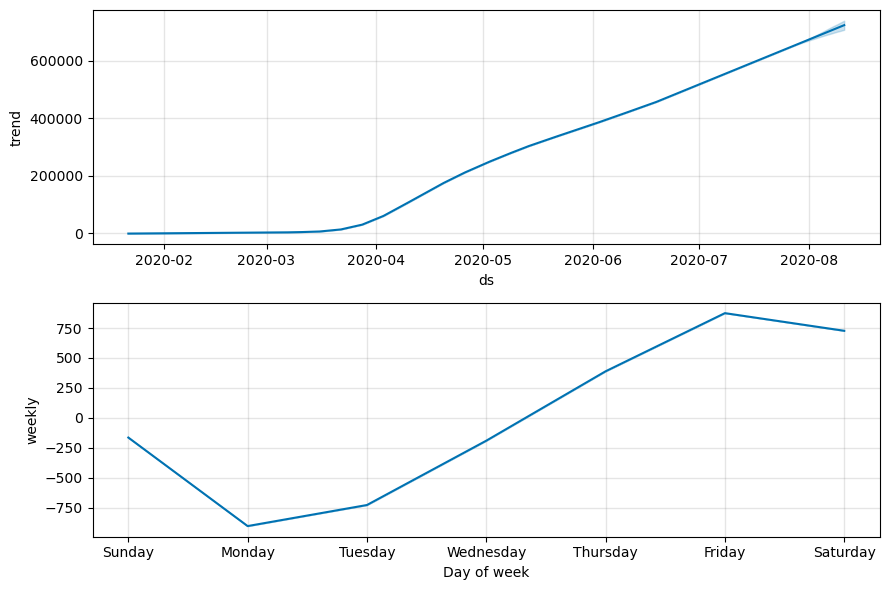

In [66]:
bb1 = model2.plot_components(future)

In [48]:
model3 = Prophet(interval_width=0.95)
model3.fit(recovered)

19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:15 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
dataframe3 = model3.make_future_dataframe(periods=10,freq='D')
dataframe3.tail()

,ds
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06


In [56]:
forcast3 = model3.predict(dataframe3)
forcast3[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1.769955e+04,-1.311033e+05,1.030314e+05
1,2020-01-23,-1.050899e+04,-1.231866e+05,1.053868e+05
2,2020-01-24,-4.573081e+03,-1.249640e+05,1.167486e+05
3,2020-01-25,1.458107e+02,-1.134724e+05,1.212406e+05
4,2020-01-26,-9.414161e+03,-1.229850e+05,1.078282e+05
...,...,...,...,...
193,2020-08-02,1.000651e+07,9.898683e+06,1.012453e+07
194,2020-08-03,1.014307e+07,1.000972e+07,1.028439e+07
195,2020-08-04,1.027046e+07,1.013731e+07,1.041850e+07
196,2020-08-05,1.041268e+07,1.026536e+07,1.056818e+07


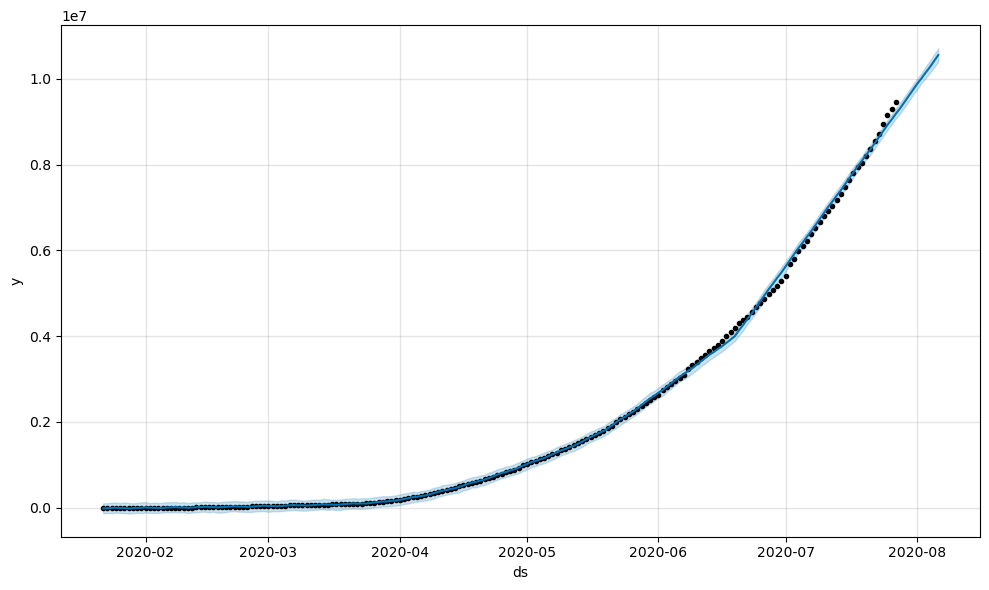

In [58]:
cc = model3.plot(forcast3)

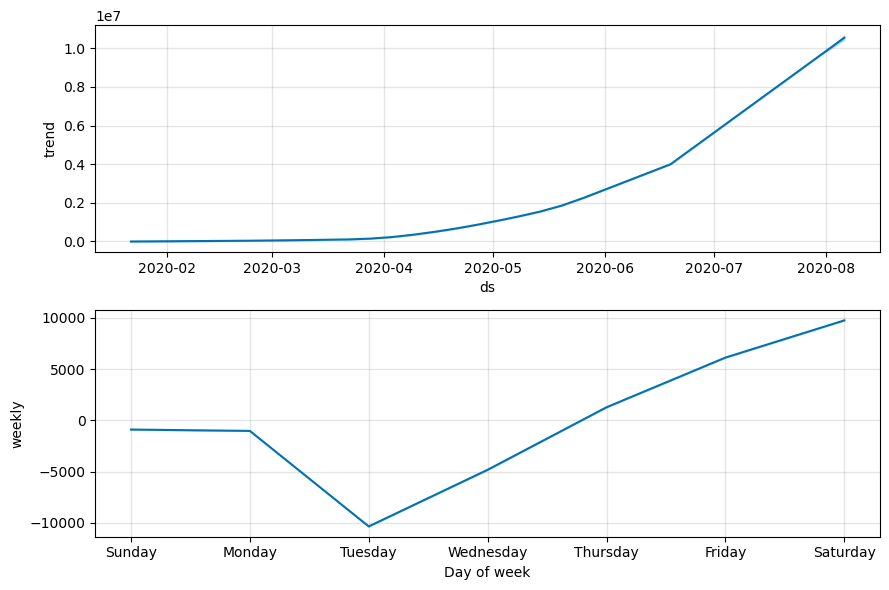

In [60]:
cc1 = model3.plot_components(forcast3)

In [67]:
model4 = Prophet(interval_width=0.95)
model4.fit(active)

19:51:42 - cmdstanpy - INFO - Chain [1] start processing
19:51:42 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
dataframe4 = model4.make_future_dataframe(periods=20,freq='D')

In [72]:
dataframe4.tail()

,ds
203,2020-08-12
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16


In [74]:
future4 = model4.predict(dataframe4)
future4[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-6.686869e+03,-7.742437e+04,6.357087e+04
1,2020-01-23,-1.595557e+03,-6.715848e+04,6.408736e+04
2,2020-01-24,6.078524e+03,-6.635170e+04,7.728044e+04
3,2020-01-25,7.876809e+03,-6.349359e+04,7.452066e+04
4,2020-01-26,1.479678e+04,-5.620803e+04,8.222685e+04
...,...,...,...,...
203,2020-08-12,7.287080e+06,7.136877e+06,7.443181e+06
204,2020-08-13,7.352527e+06,7.180316e+06,7.529010e+06
205,2020-08-14,7.420558e+06,7.251274e+06,7.610691e+06
206,2020-08-15,7.482712e+06,7.303862e+06,7.681743e+06


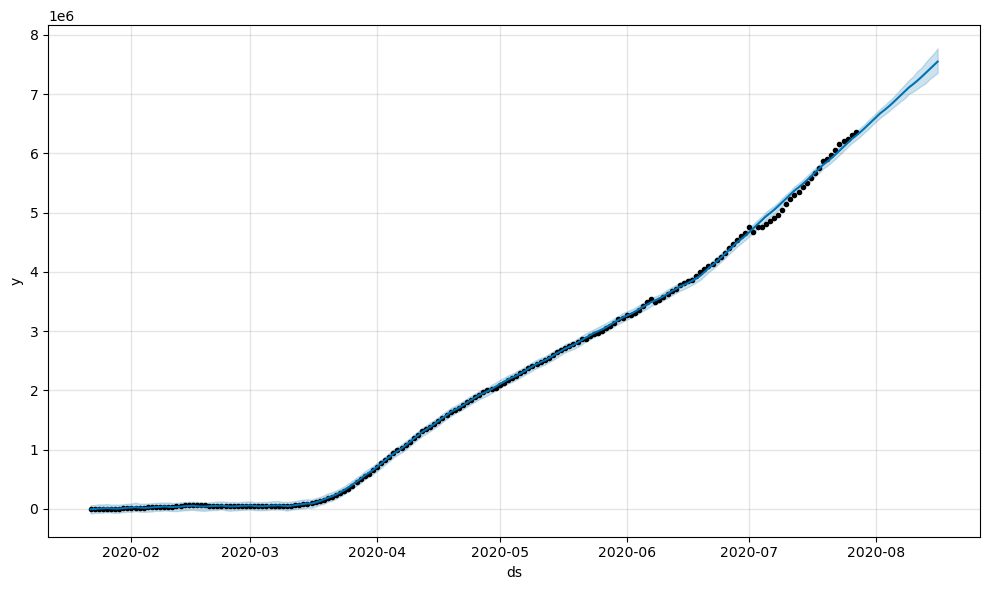

In [75]:
aa4 = model4.plot(future4)

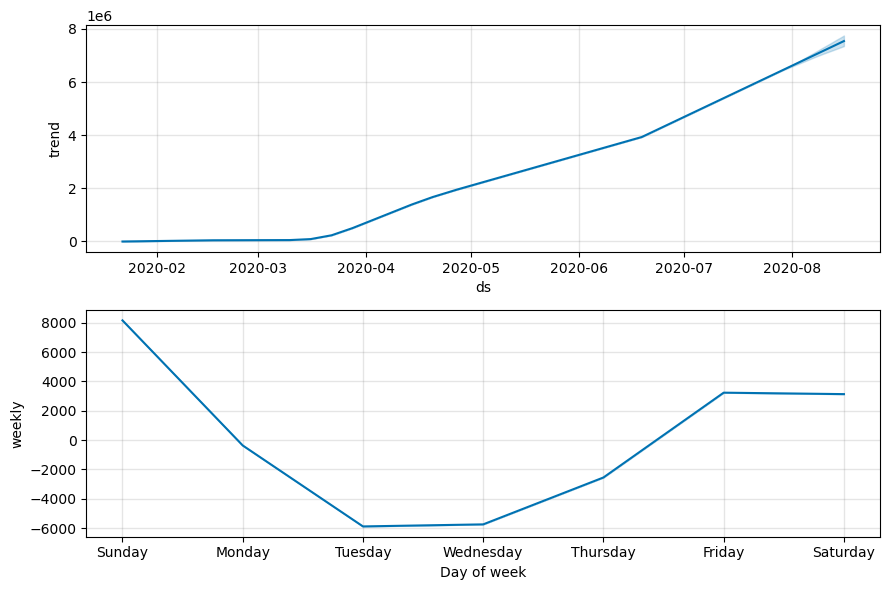

In [80]:
bb4 = model4.plot_components(future4)